<a href="https://colab.research.google.com/github/pumplay01/pumplay01/blob/main/Customer_Single_View_6month_vs_3month.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Read the .csv file
df = pd.read_csv('/content/drive/MyDrive/NIDA/supermarket.csv')

# Display the contents of the DataFrame
print(df)

        SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200734   20071019             6          8         1   9.50   
1          200805   20080328             6         21         1   1.49   
2          200716   20070612             3          9         1   0.86   
3          200815   20080604             4         10         3   0.90   
4          200626   20060824             5         16         1   1.77   
...           ...        ...           ...        ...       ...    ...   
578077     200738   20071116             6         12         1   0.01   
578078     200716   20070612             3         12         1  13.76   
578079     200637   20061109             5         16         1   4.47   
578080     200717   20070624             1         10         1   4.92   
578081     200744   20071229             7         14         1   9.27   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30  ...  \
0       PRD0901335      CL00058     DEP00016 

In [3]:
# Drop rows with null values
df = df.dropna()

# Display the modified DataFrame
print(df)

        SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200734   20071019             6          8         1   9.50   
1115       200815   20080605             5         15         1   0.70   
1116       200642   20061213             4         15         1   2.04   
1117       200720   20070713             6         17         1   2.19   
1118       200816   20080609             2         12         1   0.61   
...           ...        ...           ...        ...       ...    ...   
578073     200646   20070108             2         14         9   0.09   
578075     200803   20080313             5         16        11   0.11   
578076     200646   20070109             3         10         1   0.01   
578078     200716   20070612             3         12         1  13.76   
578080     200717   20070624             1         10         1   4.92   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30  ...  \
0       PRD0901335      CL00058     DEP00016 

Create for last 6 month

In [4]:
from datetime import datetime, timedelta

# Convert SHOP_DATE column to datetime format
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')

In [5]:
# Determine the date range for the last 6 months
end_date = df['SHOP_DATE'].max()
start_date = end_date - pd.DateOffset(months=6)

# Filter the data for the last 6 months
filtered_data = df[(df['SHOP_DATE'] >= start_date) & (df['SHOP_DATE'] <= end_date)]

In [13]:
# Create a new DataFrame with customer-related information and behavior metrics
customer_data = filtered_data[[
    'CUST_CODE',
    'CUST_PRICE_SENSITIVITY',
    'CUST_LIFESTAGE',
    'PROD_CODE_10',
    'BASKET_SIZE',
    'BASKET_PRICE_SENSITIVITY',
    'BASKET_TYPE',
    'BASKET_DOMINANT_MISSION',
    'STORE_FORMAT',
    'STORE_REGION',
    'SPEND',
    'QUANTITY',
    'SHOP_DATE'
]]

# Perform any necessary data cleaning or preprocessing steps on customer_data

# Aggregate the data at the customer level
customer_behavior_6 = customer_data.groupby('CUST_CODE').agg({
    'CUST_LIFESTAGE': 'first',
    'PROD_CODE_10': 'first',
    'BASKET_DOMINANT_MISSION': 'first',
    'SPEND': 'sum',
    'QUANTITY': 'sum',
    'SHOP_DATE': 'nunique'  # Count the unique dates to get the frequency
})

# Rename the columns in the aggregated DataFrame
customer_behavior_6.rename(columns={
    'CUST_LIFESTAGE': 'Life_Stage_6',
    'PROD_CODE_10': 'PROD_CODE_10_6',
    'BASKET_DOMINANT_MISSION': 'BASKET_DOMINANT_MISSION_6',
    'SPEND': 'Total_Spend_6',
    'QUANTITY': 'Total_Quantity_6',
    'SHOP_DATE': 'Purchase_Frequency_6'
}, inplace=True)

# Display the customer behavior for the last 6 months
print(customer_behavior_6)


               Life_Stage_6 PROD_CODE_10_6 BASKET_DOMINANT_MISSION_6  \
CUST_CODE                                                              
CUST0000001194           OT        CL00100                     Fresh   
CUST0000002605           OT        CL00164                   Grocery   
CUST0000002637           OA        CL00067                     Fresh   
CUST0000002813           OT        CL00159                     Fresh   
CUST0000003287           YF        CL00073                     Mixed   
...                     ...            ...                       ...   
CUST0000999024           OT        CL00163                     Mixed   
CUST0000999439           YA        CL00164                   Grocery   
CUST0000999593           YF        CL00167                   Grocery   
CUST0000999935           YF        CL00151                     Mixed   
CUST0000999936           YF        CL00063                     Fresh   

                Total_Spend_6  Total_Quantity_6  Purchase_Frequ

Check null

In [14]:
# Check for null values in each column
null_counts = customer_behavior_6.isnull().sum()

# Display the null counts for each column
print(null_counts)

Life_Stage_6                 0
PROD_CODE_10_6               0
BASKET_DOMINANT_MISSION_6    0
Total_Spend_6                0
Total_Quantity_6             0
Purchase_Frequency_6         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

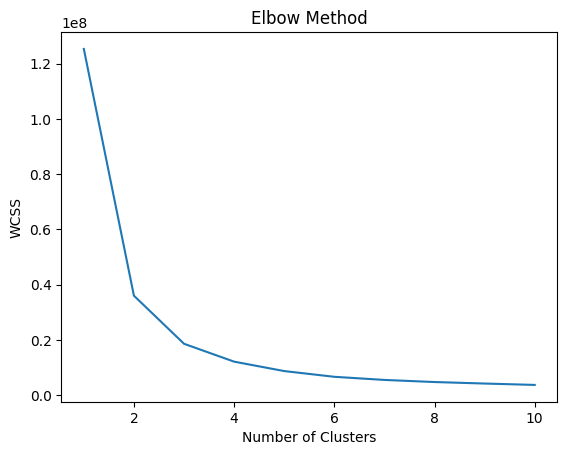

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['Total_Spend_6', 'Total_Quantity_6', 'Purchase_Frequency_6']

# Create a subset of the dataset with the selected columns
df_cluster = customer_behavior_6[cluster_cols]

# Perform K-means clustering with different numbers of clusters
wcss = []
max_clusters = 10  # Maximum number of clusters to try

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


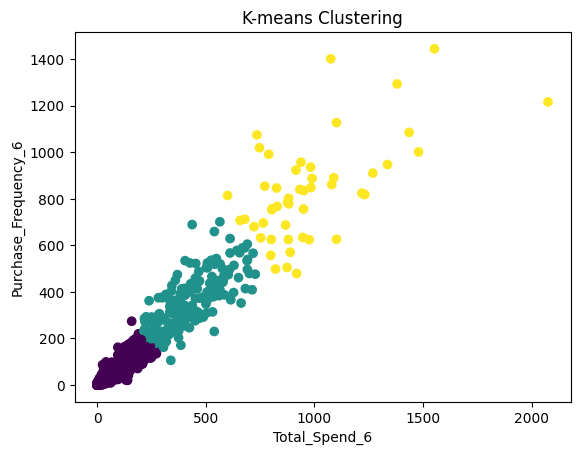

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['Total_Spend_6', 'Total_Quantity_6', 'Purchase_Frequency_6']

# Create a subset of the dataset with the selected columns
df_cluster = customer_behavior_6[cluster_cols]

# Perform K-means clustering with the optimal number of clusters
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_cluster)

# Add the cluster labels to the dataset
customer_behavior_6['cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(customer_behavior_6['Total_Spend_6'], customer_behavior_6['Total_Quantity_6'], c=customer_behavior_6['cluster'], cmap='viridis')
plt.xlabel('Total_Spend_6')
plt.ylabel('Purchase_Frequency_6')
plt.title('K-means Clustering')
plt.show()

In [18]:
# Define the columns for which you want to calculate the statistics
columns_of_interest = ['Total_Spend_6', 'Total_Quantity_6','Purchase_Frequency_6']

# Calculate the mean, minimum, and maximum values for the specified columns in each cluster
cluster_stats_mean = customer_behavior_6.groupby('cluster')[columns_of_interest].agg(['mean'])

# Display the cluster statistics
cluster_stats_mean = cluster_stats_mean.round(1)

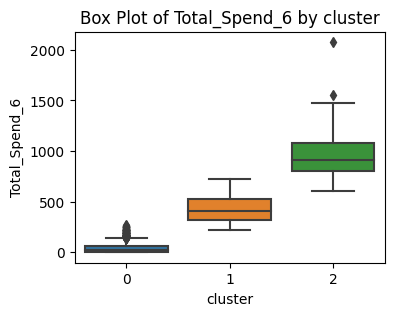

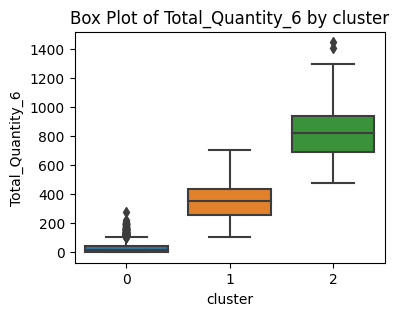

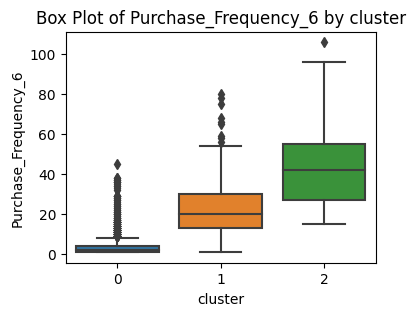

        Total_Spend_6 Total_Quantity_6 Purchase_Frequency_6
                 mean             mean                 mean
cluster                                                    
0                42.1             33.2                  3.9
1               426.8            356.5                 23.5
2               979.3            834.6                 43.5


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which you want to calculate the statistics
columns_of_interest = ['Total_Spend_6', 'Total_Quantity_6','Purchase_Frequency_6']

# Create box plots for each column in each cluster
for column in columns_of_interest:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='cluster', y=column, data=customer_behavior_6)
    plt.title(f'Box Plot of {column} by cluster')
    plt.xlabel('cluster')
    plt.ylabel(column)
    plt.show()
print(cluster_stats_mean)

which one are common life stage

In [20]:
print(customer_behavior_6)

               Life_Stage_6 PROD_CODE_10_6 BASKET_DOMINANT_MISSION_6  \
CUST_CODE                                                              
CUST0000001194           OT        CL00100                     Fresh   
CUST0000002605           OT        CL00164                   Grocery   
CUST0000002637           OA        CL00067                     Fresh   
CUST0000002813           OT        CL00159                     Fresh   
CUST0000003287           YF        CL00073                     Mixed   
...                     ...            ...                       ...   
CUST0000999024           OT        CL00163                     Mixed   
CUST0000999439           YA        CL00164                   Grocery   
CUST0000999593           YF        CL00167                   Grocery   
CUST0000999935           YF        CL00151                     Mixed   
CUST0000999936           YF        CL00063                     Fresh   

                Total_Spend_6  Total_Quantity_6  Purchase_Frequ

In [22]:
# Change 'John' to 'Jhons' in the 'Name' column
customer_behavior_6['Life_Stage_6'] = customer_behavior_6['Life_Stage_6'].replace('OT', 'Other')
customer_behavior_6['Life_Stage_6'] = customer_behavior_6['Life_Stage_6'].replace('YF', 'Young Families')

In [28]:
# Group the DataFrame by the 'Cluster' column and calculate the most frequent 'PROD_CODE'
most_common_life_stage = customer_behavior_6.groupby('cluster')['Life_Stage_6'].apply(lambda x: x.value_counts().idxmax())
most_common_PROD_CODE_10_6 = customer_behavior_6.groupby('cluster')['PROD_CODE_10_6'].apply(lambda x: x.value_counts().idxmax())
most_common_BASKET_DOMINANT_MISSION_6 = customer_behavior_6.groupby('cluster')['BASKET_DOMINANT_MISSION_6'].apply(lambda x: x.value_counts().idxmax())
# Display the most frequent PROD_CODE for each cluster
print("\nMost life stage each cluster")
print(most_common_life_stage)

print("\nMost PROD_CODE_10_6 each cluster")
print(most_common_PROD_CODE_10_6)

print("\nMost BASKET_DOMINANT_MISSION_6 each cluster")
print(most_common_BASKET_DOMINANT_MISSION_6)



Most life stage each cluster
cluster
0             Other
1             Other
2    Young Families
Name: Life_Stage_6, dtype: object

Most PROD_CODE_10_6 each cluster
cluster
0    CL00063
1    CL00063
2    CL00006
Name: PROD_CODE_10_6, dtype: object

Most BASKET_DOMINANT_MISSION_6 each cluster
cluster
0    Fresh
1    Fresh
2    Fresh
Name: BASKET_DOMINANT_MISSION_6, dtype: object


Create last 3 month

In [ ]:
from datetime import datetime, timedelta

# Convert SHOP_DATE column to datetime format
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')

In [ ]:
# Determine the date range for the last 3 months
end_date = df['SHOP_DATE'].max()
start_date = end_date - pd.DateOffset(months=3)

# Filter the data for the last 3 months
filtered_data = df[(df['SHOP_DATE'] >= start_date) & (df['SHOP_DATE'] <= end_date)]

In [30]:
# Create a new DataFrame with customer-related information and behavior metrics
customer_data = filtered_data[[
    'CUST_CODE',
    'CUST_PRICE_SENSITIVITY',
    'CUST_LIFESTAGE',
    'PROD_CODE_10',
    'BASKET_SIZE',
    'BASKET_PRICE_SENSITIVITY',
    'BASKET_TYPE',
    'BASKET_DOMINANT_MISSION',
    'STORE_FORMAT',
    'STORE_REGION',
    'SPEND',
    'QUANTITY',
    'SHOP_DATE'
]]

# Perform any necessary data cleaning or preprocessing steps on customer_data

# Aggregate the data at the customer level
customer_behavior_3 = customer_data.groupby('CUST_CODE').agg({
    'CUST_LIFESTAGE': 'first',
    'PROD_CODE_10': 'first',
    'BASKET_DOMINANT_MISSION': 'first',
    'SPEND': 'sum',
    'QUANTITY': 'sum',
    'SHOP_DATE': 'nunique'  # Count the unique dates to get the frequency
})

# Rename the columns in the aggregated DataFrame
customer_behavior_3.rename(columns={
    'CUST_LIFESTAGE': 'Life_Stage',
    'PROD_CODE_10': 'PROD_CODE_10_first',
    'BASKET_DOMINANT_MISSION': 'BASKET_DOMINANT_MISSION_first',
    'SPEND': 'Total_Spend_3',
    'QUANTITY': 'Total_Quantity_3',
    'SHOP_DATE': 'Purchase_Frequency_3'
}, inplace=True)

# Display the customer behavior for the last 3 months
print(customer_behavior_3)


               Life_Stage PROD_CODE_10_first BASKET_DOMINANT_MISSION_first  \
CUST_CODE                                                                    
CUST0000001194         OT            CL00100                         Fresh   
CUST0000002605         OT            CL00164                       Grocery   
CUST0000002637         OA            CL00067                         Fresh   
CUST0000002813         OT            CL00159                         Fresh   
CUST0000003287         YF            CL00073                         Mixed   
...                   ...                ...                           ...   
CUST0000999024         OT            CL00163                         Mixed   
CUST0000999439         YA            CL00164                       Grocery   
CUST0000999593         YF            CL00167                       Grocery   
CUST0000999935         YF            CL00151                         Mixed   
CUST0000999936         YF            CL00063                    

In [31]:
# Check for null values in each column
null_counts = customer_behavior_3.isnull().sum()

# Display the null counts for each column
print(null_counts)

Life_Stage                       0
PROD_CODE_10_first               0
BASKET_DOMINANT_MISSION_first    0
Total_Spend_3                    0
Total_Quantity_3                 0
Purchase_Frequency_3             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

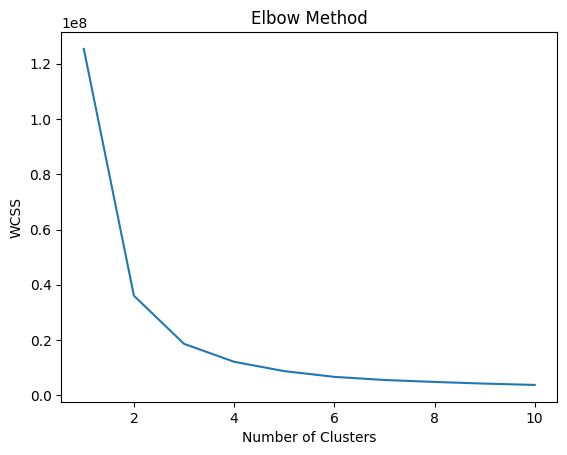

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['Total_Spend_3', 'Total_Quantity_3', 'Purchase_Frequency_3']

# Create a subset of the dataset with the selected columns
df_cluster = customer_behavior_3[cluster_cols]

# Perform K-means clustering with different numbers of clustersk
wcss = []
max_clusters = 10  # Maximum number of clusters to try

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


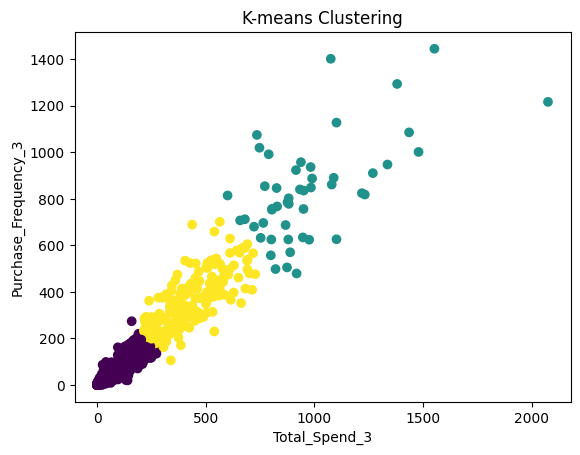

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns for clustering
cluster_cols = ['Total_Spend_3', 'Total_Quantity_3', 'Purchase_Frequency_3']

# Create a subset of the dataset with the selected columns
df_cluster = customer_behavior_3[cluster_cols]

# Perform K-means clustering with the optimal number of clusters
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_cluster)

# Add the cluster labels to the dataset
customer_behavior_3['cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(customer_behavior_3['Total_Spend_3'], customer_behavior_3['Total_Quantity_3'], c=customer_behavior_3['cluster'], cmap='viridis')
plt.xlabel('Total_Spend_3')
plt.ylabel('Purchase_Frequency_3')
plt.title('K-means Clustering')
plt.show()

In [34]:
# Define the columns for which you want to calculate the statistics
columns_of_interest = ['Total_Spend_3', 'Total_Quantity_3','Purchase_Frequency_3']

# Calculate the mean, minimum, and maximum values for the specified columns in each cluster
cluster_stats_mean = customer_behavior_3.groupby('cluster')[columns_of_interest].agg(['mean'])

# Display the cluster statistics
cluster_stats_mean = cluster_stats_mean.round(1)

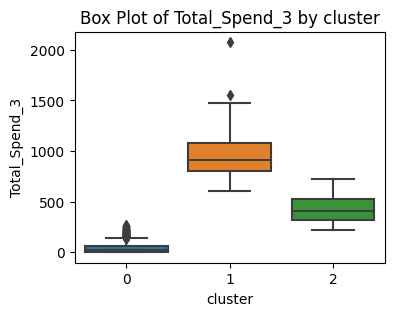

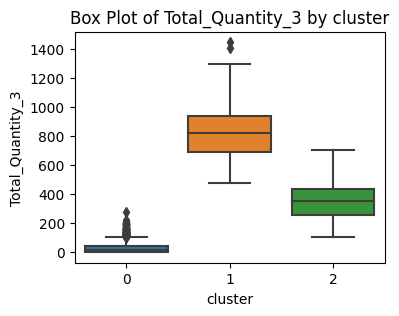

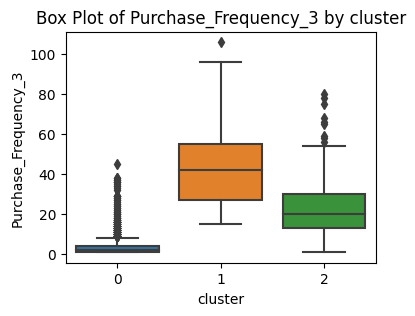

        Total_Spend_3 Total_Quantity_3 Purchase_Frequency_3
                 mean             mean                 mean
cluster                                                    
0                42.1             33.2                  3.9
1               979.3            834.6                 43.5
2               426.8            356.5                 23.5


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which you want to calculate the statistics
columns_of_interest = ['Total_Spend_3', 'Total_Quantity_3','Purchase_Frequency_3']

# Create box plots for each column in each cluster
for column in columns_of_interest:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='cluster', y=column, data=customer_behavior_3)
    plt.title(f'Box Plot of {column} by cluster')
    plt.xlabel('cluster')
    plt.ylabel(column)
    plt.show()
print(cluster_stats_mean)

In [36]:
print(customer_behavior_3)

               Life_Stage PROD_CODE_10_first BASKET_DOMINANT_MISSION_first  \
CUST_CODE                                                                    
CUST0000001194         OT            CL00100                         Fresh   
CUST0000002605         OT            CL00164                       Grocery   
CUST0000002637         OA            CL00067                         Fresh   
CUST0000002813         OT            CL00159                         Fresh   
CUST0000003287         YF            CL00073                         Mixed   
...                   ...                ...                           ...   
CUST0000999024         OT            CL00163                         Mixed   
CUST0000999439         YA            CL00164                       Grocery   
CUST0000999593         YF            CL00167                       Grocery   
CUST0000999935         YF            CL00151                         Mixed   
CUST0000999936         YF            CL00063                    

In [37]:
# Change 'John' to 'Jhons' in the 'Name' column
customer_behavior_3['Life_Stage'] = customer_behavior_3['Life_Stage'].replace('OT', 'Other')
customer_behavior_3['Life_Stage'] = customer_behavior_3['Life_Stage'].replace('YF', 'Young Families')

In [39]:
# Group the DataFrame by the 'Cluster' column and calculate the most frequent 'PROD_CODE'
most_common_life_stage = customer_behavior_3.groupby('cluster')['Life_Stage'].apply(lambda x: x.value_counts().idxmax())
most_common_PROD_CODE_10_3 = customer_behavior_3.groupby('cluster')['PROD_CODE_10_first'].apply(lambda x: x.value_counts().idxmax())
most_common_BASKET_DOMINANT_MISSION_3 = customer_behavior_3.groupby('cluster')['BASKET_DOMINANT_MISSION_first'].apply(lambda x: x.value_counts().idxmax())
# Display the most frequent PROD_CODE for each cluster
print("\nMost life stage each cluster")
print(most_common_life_stage)

print("\nMost PROD_CODE_10_3 each cluster")
print(most_common_PROD_CODE_10_6)

print("\nMost BASKET_DOMINANT_MISSION_3 each cluster")
print(most_common_BASKET_DOMINANT_MISSION_6)



Most life stage each cluster
cluster
0             Other
1    Young Families
2             Other
Name: Life_Stage, dtype: object

Most PROD_CODE_10_3 each cluster
cluster
0    CL00063
1    CL00063
2    CL00006
Name: PROD_CODE_10_6, dtype: object

Most BASKET_DOMINANT_MISSION_3 each cluster
cluster
0    Fresh
1    Fresh
2    Fresh
Name: BASKET_DOMINANT_MISSION_6, dtype: object


Export data file

In [63]:
# Save the DataFrame as a CSV file
customer_behavior_3.to_csv('Cus_last3month.csv', index=False)

In [64]:
from google.colab import files

# Download the CSV file
files.download('Cus_last3month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Save the DataFrame as a CSV file
customer_behavior_6.to_csv('Cus_last6month.csv', index=False)

In [66]:
from google.colab import files

# Download the CSV file
files.download('Cus_last6month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Import image to colab

In [67]:
from google.colab import files

In [68]:
uploaded = files.upload()

Saving Capture.JPG to Capture.JPG


In [71]:
from PIL import Image

In [74]:
# Get the file name
filename = list(uploaded.keys())[0]

# Open the uploaded image
image = Image.open(filename)

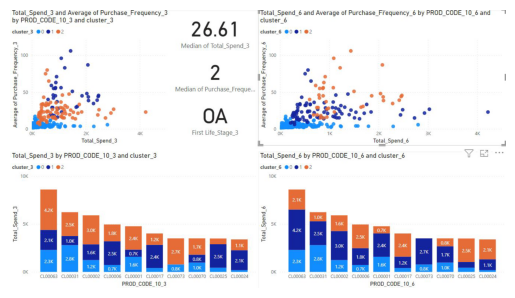

In [75]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()